# Install triton client

In [1]:
!pip install tritonclient[all]

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 248.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 373.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 365.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 307.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 304.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 350.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.0/264.0 kB 358.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 335.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 243.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.9/258.9 kB 382.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.7/613.7 kB 396.6 MB/s eta 0:00:00


# yolo models config



```
name: "yolov5"
backend: "onnxruntime"
max_batch_size: 2
input [
{
    name: "images"
    data_type: TYPE_FP32
    dims: [3, -1, -1 ]
    
}
]
output[
{
    name: "output0"
    data_type: TYPE_FP32
    dims: [ -1, -1 ]
}
]

```

Write an example config.pbtxt

In [2]:
data = """
name: "yolov5"
backend: "onnxruntime"
max_batch_size: 2
input [
{
    name: "images"
    data_type: TYPE_FP32
    dims: [3, -1, -1 ]
    
}
]
output[
{
    name: "output0"
    data_type: TYPE_FP32
    dims: [ -1, -1 ]
}
]
"""


with open ('config.pbtxt', 'w') as f:
    f.write(data)

Manually push the model to directory.

Polling mode doesnot allow to push model to repo by triton client api

In [1]:

import tritonclient.http as httpclient

In [7]:



triton_client = httpclient.InferenceServerClient(url="localhost:8000",
                                                         verbose=1)


model_name = 'yolov5'

# get all the current models
triton_client.get_model_repository_index()

# if polling is enabled then following won't work
# triton_client.load_model(model_name)

# check if the model is loaded
triton_client.is_model_ready(model_name)

triton_client.get_model_config(model_name)

POST /v2/repository/index, headers None

<HTTPSocketPoolResponse status=200 headers={'content-type': 'application/json', 'content-length': '221'}>
bytearray(b'[{"name":"ensemble_python_resnet50","version":"1","state":"READY"},{"name":"preprocess","version":"1","state":"READY"},{"name":"resnet50_trt","version":"1","state":"READY"},{"name":"yolov5","version":"1","state":"READY"}]')
GET /v2/models/yolov5/ready, headers None
<HTTPSocketPoolResponse status=200 headers={'content-length': '0', 'content-type': 'text/plain'}>
GET /v2/models/yolov5/config, headers None
<HTTPSocketPoolResponse status=200 headers={'content-type': 'application/json', 'content-length': '885'}>
bytearray(b'{"name":"yolov5","platform":"onnxruntime_onnx","backend":"onnxruntime","version_policy":{"latest":{"num_versions":1}},"max_batch_size":2,"input":[{"name":"images","data_type":"TYPE_FP32","format":"FORMAT_NONE","dims":[3,-1,-1],"is_shape_tensor":false,"allow_ragged_batch":false,"optional":false}],"output":[{"name":"

{'name': 'yolov5',
 'platform': 'onnxruntime_onnx',
 'backend': 'onnxruntime',
 'version_policy': {'latest': {'num_versions': 1}},
 'max_batch_size': 2,
 'input': [{'name': 'images',
   'data_type': 'TYPE_FP32',
   'format': 'FORMAT_NONE',
   'dims': [3, -1, -1],
   'is_shape_tensor': False,
   'allow_ragged_batch': False,
   'optional': False}],
 'output': [{'name': 'output0',
   'data_type': 'TYPE_FP32',
   'dims': [-1, -1],
   'label_filename': '',
   'is_shape_tensor': False}],
 'batch_input': [],
 'batch_output': [],
 'optimization': {'priority': 'PRIORITY_DEFAULT',
  'input_pinned_memory': {'enable': True},
  'output_pinned_memory': {'enable': True},
  'gather_kernel_buffer_threshold': 0,
  'eager_batching': False},
 'instance_group': [{'name': 'yolov5',
   'kind': 'KIND_GPU',
   'count': 1,
   'gpus': [0],
   'secondary_devices': [],
   'profile': [],
   'passive': False,
   'host_policy': ''}],
 'default_model_filename': 'model.onnx',
 'cc_model_filenames': {},
 'metric_tags': 

# Preprocessing

In [8]:
from typing import Tuple

import numpy as np
import cv2


def letterbox(img: np.ndarray,
              new_shape: Tuple[int] = (640, 640),
              color: Tuple[int] = (114, 114, 114),
              auto: bool = True,
              scale_fill: bool = False,
              scaleup: bool = True,
              stride: bool = 32) -> np.ndarray:
    """Reshape image without affecting the aspect ratio by adding minimum
    letter box type borders, and fill the border area with gray or the
    specified color. Resize and pad image while meeting stride-multiple constraints
    Args:
        img (np.ndarray): original image
        new_shape (Tuple[int], optional): shape of output image. Defaults to (640, 640).
        color (Tuple[int], optional): color to be filled in borders. Defaults to (114, 114, 114).
        auto (bool, optional): pick minimum rectangle . Defaults to True.
        scale_fill (bool, optional): strech. Defaults to False.
        scaleup (bool, optional): scale up if needed. Defaults to True.
        stride (bool, optional): used for auto. Defaults to 32.
    Returns:
        np.ndarray: resulting image
    """

    # current shape [height, width]
    shape = img.shape[:2]

    # new shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    scale_ratio = min(new_shape[0] / shape[0], new_shape[1] / shape[1])

    # only scale down, do not scale up (for better test mAP)
    if not scaleup:
        scale_ratio = min(scale_ratio, 1.0)

    # Compute padding
    # ratio = r, r  # width, height ratios
    new_unpad = (int(round(shape[1] * scale_ratio)),
                 int(round(shape[0] * scale_ratio)))

    # wh padding
    delta_width = new_shape[1] - new_unpad[0]
    delta_height = new_shape[0] - new_unpad[1]

    # minimum rectangle
    if auto:
        # update wh padding
        delta_width = np.mod(delta_width, stride)
        delta_height = np.mod(delta_height, stride)

    # stretch
    elif scale_fill:
        delta_width, delta_height = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])

        # width, height ratios
        # ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]

    # divide padding into 2 sides
    delta_width /= 2
    delta_height /= 2

    # resize
    if shape[::-1] != new_unpad:
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)

    # add border
    img = cv2.copyMakeBorder(img,
                             int(round(delta_height - 0.1)),
                             int(round(delta_height + 0.1)),
                             int(round(delta_width - 0.1)),
                             int(round(delta_width + 0.1)),
                             cv2.BORDER_CONSTANT,
                             value=color)
    return img

In [9]:
def bgr_to_rgb(image: np.ndarray) -> np.ndarray:
    """Convert BGR to RGB image.
    BGR = Blue-Green-Red
    RGB = Red-Green-Blue
    Args:
        image (np.ndarray): BGR format image.
    Returns:
        np.ndarray: RGB format image.
    """
    return image[..., ::-1]

In [10]:
_preprocess = [letterbox, bgr_to_rgb]
_postprocess = []

# Simple inference code

🔗 https://github.com/EscaticZheng/yolov5-onnx-inference/blob/main/onnx_cpu_detect.py

In [15]:
#inference only for onnx
import onnxruntime
import torch
import torchvision
import cv2
import numpy as np
import time
w = '/home/fsuser/python_backend/examples/preprocessing/yolov5n.onnx'
providers = ['CPUExecutionProvider']
session = onnxruntime.InferenceSession(w, providers=providers)
#warmup to reduce the first inference time but useless in fact.
# t1 = time.time()
# im = torch.zeros((1,3,640,640), dtype=torch.float, device=torch.device('cuda'))
# im = im.cpu().numpy()  # torch to numpy
# y = session.run([session.get_outputs()[0].name], {session.get_inputs()[0].name: im})[0]
# t2 = time.time()
# print(t2-t1)
#preprocess img to array
def letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im
def xywh2xyxy(x):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[:, 0] = x[:, 0] - x[:, 2] / 2  # top left x
    y[:, 1] = x[:, 1] - x[:, 3] / 2  # top left y
    y[:, 2] = x[:, 0] + x[:, 2] / 2  # bottom right x
    y[:, 3] = x[:, 1] + x[:, 3] / 2  # bottom right y
    return y
def box_area(box):
    # box = xyxy(4,n)
    return (box[2] - box[0]) * (box[3] - box[1])
def box_iou(box1, box2, eps=1e-7):
    # inter(N,M) = (rb(N,M,2) - lt(N,M,2)).clamp(0).prod(2)
    (a1, a2), (b1, b2) = box1[:, None].chunk(2, 2), box2.chunk(2, 1)
    inter = (torch.min(a2, b2) - torch.max(a1, b1)).clamp(0).prod(2)

    # IoU = inter / (area1 + area2 - inter)
    return inter / (box_area(box1.T)[:, None] + box_area(box2.T) - inter + eps)
def non_max_suppression(prediction,
                        conf_thres=0.25,
                        iou_thres=0.45,
                        agnostic=False,
                        max_det=300):
    bs = prediction.shape[0]  # batch size
    xc = prediction[..., 4] > conf_thres  # candidates
    # Settings
    # min_wh = 2  # (pixels) minimum box width and height
    max_wh = 7680  # (pixels) maximum box width and height
    max_nms = 30000  # maximum number of boxes into torchvision.ops.nms()
    redundant = True  # require redundant detections
    merge = False  # use merge-NMS
    output = [torch.zeros((0, 6), device = prediction.device)] * bs
    for xi, x in enumerate(prediction):  # image index, image inference
        # Apply constraints
        # x[((x[..., 2:4] < min_wh) | (x[..., 2:4] > max_wh)).any(1), 4] = 0  # width-height
        x = x[xc[xi]]  # confidence
        # If none remain process next image
        if not x.shape[0]:
            continue

        # Compute conf
        x[:, 5:] *= x[:, 4:5]  # conf = obj_conf * cls_conf

        # Box (center x, center y, width, height) to (x1, y1, x2, y2)
        box = xywh2xyxy(x[:, :4])

        # Detections matrix nx6 (xyxy, conf, cls)
        conf, j = x[:, 5:].max(1, keepdim=True)
        x = torch.cat((box, conf, j.float()), 1)[conf.view(-1) > conf_thres]
        # Apply finite constraint
        # if not torch.isfinite(x).all():
        #     x = x[torch.isfinite(x).all(1)]

        # Check shape
        n = x.shape[0]  # number of boxes
        if not n:  # no boxes
            continue
        elif n > max_nms:  # excess boxes
            x = x[x[:, 4].argsort(descending=True)[:max_nms]]  # sort by confidence

        # Batched NMS
        c = x[:, 5:6] * (0 if agnostic else max_wh)  # classes
        boxes, scores = x[:, :4] + c, x[:, 4]  # boxes (offset by class), scores
        i = torchvision.ops.nms(boxes, scores, iou_thres)  # NMS
        if i.shape[0] > max_det:  # limit detections
            i = i[:max_det]
        if merge and (1 < n < 3E3):  # Merge NMS (boxes merged using weighted mean)
            # update boxes as boxes(i,4) = weights(i,n) * boxes(n,4)
            iou = box_iou(boxes[i], boxes) > iou_thres  # iou matrix
            weights = iou * scores[None]  # box weights
            x[i, :4] = torch.mm(weights, x[:, :4]).float() / weights.sum(1, keepdim=True)  # merged boxes
            if redundant:
                i = i[iou.sum(1) > 1]  # require redundancy

        output[xi] = x[i]
    return output
def scale_coords(img1_shape, coords, img0_shape, ratio_pad=None):
    # Rescale coords (xyxy) from img1_shape to img0_shape
    if ratio_pad is None:  # calculate from img0_shape
        gain = min(img1_shape[0] / img0_shape[0], img1_shape[1] / img0_shape[1])  # gain  = old / new
        pad = (img1_shape[1] - img0_shape[1] * gain) / 2, (img1_shape[0] - img0_shape[0] * gain) / 2  # wh padding
    else:
        gain = ratio_pad[0][0]
        pad = ratio_pad[1]

    coords[:, [0, 2]] -= pad[0]  # x padding
    coords[:, [1, 3]] -= pad[1]  # y padding
    coords[:, :4] /= gain
    clip_coords(coords, img0_shape)
    return coords
def clip_coords(boxes, shape):
    # Clip bounding xyxy bounding boxes to image shape (height, width)
    if isinstance(boxes, torch.Tensor):  # faster individually
        boxes[:, 0].clamp_(0, shape[1])  # x1
        boxes[:, 1].clamp_(0, shape[0])  # y1
        boxes[:, 2].clamp_(0, shape[1])  # x2
        boxes[:, 3].clamp_(0, shape[0])  # y2
    else:  # np.array (faster grouped)
        boxes[:, [0, 2]] = boxes[:, [0, 2]].clip(0, shape[1])  # x1, x2
        boxes[:, [1, 3]] = boxes[:, [1, 3]].clip(0, shape[0])  # y1, y2
class Annotator:
    def __init__(self, im, line_width=None):
        assert im.data.contiguous, 'Image not contiguous. Apply np.ascontiguousarray(im) to Annotator() input images.'
        self.im = im
        self.lw = line_width or max(round(sum(im.shape) / 2 * 0.003), 2)  # line width

    def box_label(self, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
        # Add one xyxy box to image with label
        p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
        cv2.rectangle(self.im, p1, p2, color, thickness=self.lw, lineType=cv2.LINE_AA)
        if label:
            tf = max(self.lw - 1, 1)  # font thickness
            w, h = cv2.getTextSize(label, 0, fontScale=self.lw / 3, thickness=tf)[0]  # text width, height
            outside = p1[1] - h >= 3
            p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
            cv2.rectangle(self.im, p1, p2, color, -1, cv2.LINE_AA)  # filled
            cv2.putText(self.im,
                        label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                        0,
                        self.lw / 3,
                        txt_color,
                        thickness=tf,
                        lineType=cv2.LINE_AA)

    def rectangle(self, xy, fill=None, outline=None, width=1):
        # Add rectangle to image (PIL-only)
        self.draw.rectangle(xy, fill, outline, width)

    def text(self, xy, text, txt_color=(255, 255, 255)):
        # Add text to image (PIL-only)
        w, h = self.font.getsize(text)  # text width, height
        self.draw.text((xy[0], xy[1] - h + 1), text, fill=txt_color, font=self.font)

    def result(self):
        # Return annotated image as array
        return np.asarray(self.im)
class Colors:
    def __init__(self):
        # hex = matplotlib.colors.TABLEAU_COLORS.values()
        hexs = ('FF3838', 'FF9D97', 'FF701F', 'FFB21D', 'CFD231', '48F90A', '92CC17', '3DDB86', '1A9334', '00D4BB',
                '2C99A8', '00C2FF', '344593', '6473FF', '0018EC', '8438FF', '520085', 'CB38FF', 'FF95C8', 'FF37C7')
        self.palette = [self.hex2rgb(f'#{c}') for c in hexs]
        self.n = len(self.palette)

    def __call__(self, i, bgr=False):
        c = self.palette[int(i) % self.n]
        return (c[2], c[1], c[0]) if bgr else c

    @staticmethod
    def hex2rgb(h):  # rgb order (PIL)
        return tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))


colors = Colors()  # create instance for 'from utils.plots import colors'
img0 = cv2.imread('mug.jpg')
img = letterbox(img0, (640,640), stride=32, auto=False) #only pt use auto=True, but we are onnx
img = img.transpose((2, 0, 1))[::-1]  # HWC to CHW, BGR to RGB
img = np.ascontiguousarray(img)
im = torch.from_numpy(img).to(torch.device('cpu'))
im = im.float()
im /= 255  # 0 - 255 to 0.0 - 1.0
if len(im.shape) == 3:
    im = im[None]  # expand for batch dim
im = im.cpu().numpy()  # torch to numpy
y = session.run([session.get_outputs()[0].name], {session.get_inputs()[0].name: im})[0] #inference onnx model to get the total output
#non_max_suppression to remove redundant boxes
y = torch.from_numpy(y).to(torch.device('cpu'))

# import pdb; pdb.set_trace()
# torch.Size([1, 25200, 85])
# torch.float32




# print(y)
pred = non_max_suppression(y, conf_thres = 0.25, iou_thres = 0.45, agnostic= False, max_det=1000)
import pdb;pdb.set_trace()
print(f'after NMS: {pred}')

_pred = np.array([np.array(k.tolist()).squeeze() for k in pred])

print(f"type ---> {_pred.shape}")

#transform coordinate to original picutre size
for i, det in enumerate(pred):
    # im0 --> resized image
    # im --> original image
    det[:, :4] = scale_coords(im.shape[2:], det[:, :4], img0.shape).round()
# print(det)
#labels
names = ['nofall', 'fall']
#initialize annotator
annotator = Annotator(img0, line_width=3)
#annotate the image
for *xyxy, conf, cls in reversed(det):
    c = int(cls)  # integer class
    # label = f'{names[c]} {conf:.2f}'
    # annotator.box_label(xyxy, label, color=colors(c, True))
    annotator.box_label(xyxy, f"{c}:{conf:.2f}", color=colors(c, True))
#save the image
cv2.imwrite('test_cpu.png', img0)

--Return--
None
> /tmp/ipykernel_374756/3038258996.py(227)<module>()
    225 # print(y)
    226 pred = non_max_suppression(y, conf_thres = 0.25, iou_thres = 0.45, agnostic= False, max_det=1000)
--> 227 import pdb;pdb.set_trace()
    228 print(f'after NMS: {pred}')
    229 

[tensor([], size=(0, 6))]
--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user
after NMS: [tensor([], size=(0, 6))]
type ---> (1, 0)


True

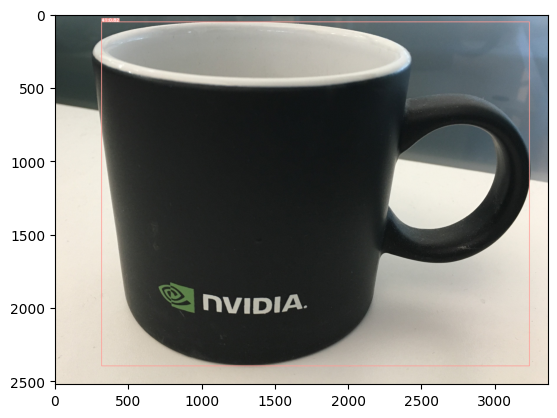

In [30]:
import matplotlib.pyplot as plt


plt.imshow(plt.imread('test_cpu.png'))